In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/PYTHON/data.csv")

In [3]:
df.shape

(50553, 12)

In [4]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


# EDA

In [6]:
df.drop("ID",axis=1,inplace=True)

In [7]:
df.drop("Gender",axis=1,inplace=True)

In [8]:
df[(df["Duration"]<0) & (df["Destination"])]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4063,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,118
38935,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,18.0,6.3,118
48367,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,22.0,7.7,118


In [9]:
(df[(df["Duration"]) & (df["Destination"]=="BANGLADESH")]).mean()
 

Claim                    0.000000
Duration                15.958333
Net Sales               27.166667
Commision (in value)     1.225000
Age                     38.604167
dtype: float64

In [10]:
df[(df["Duration"]) & (df["Destination"]=="INDONESIA")].mean()


Claim                    0.004909
Duration                31.335203
Net Sales               23.264130
Commision (in value)     3.007167
Age                     39.112202
dtype: float64

In [11]:
df[(df["Duration"]) & (df["Destination"]=="BRUNEI DARUSSALAM")].mean()

Claim                    0.003247
Duration                22.370130
Net Sales               18.659091
Commision (in value)     6.468182
Age                     43.525974
dtype: float64

In [12]:
df[(df["Duration"]) & (df["Destination"]=="INDIA")].mean()

Claim                    0.002237
Duration                30.413870
Net Sales               36.248043
Commision (in value)     7.864687
Age                     63.737136
dtype: float64

In [13]:
df["Duration"]=df['Duration'].replace(0,30)

In [14]:
# we replace duration -2 value with 16  bangladesh travel duration mean time is 16
df["Duration"]=df['Duration'].replace(-2,16)
df["Duration"]=df['Duration'].replace(-1,23)
df["Duration"]=df['Duration'].replace(-1,32)



In [15]:
 df[df["Age"]>100]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
90,JWT,Airlines,Online,Value Plan,0,58,INDIA,78.0,31.20,118
108,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
140,JWT,Airlines,Online,Value Plan,0,8,INDIA,39.0,15.60,118
153,JWT,Airlines,Online,Value Plan,0,4,INDIA,78.0,31.20,118
181,JWT,Airlines,Online,Value Plan,0,30,INDIA,31.0,12.40,118
...,...,...,...,...,...,...,...,...,...,...
50158,JWT,Airlines,Online,Value Plan,0,41,INDIA,60.0,24.00,118
50179,JWT,Airlines,Online,Value Plan,0,62,INDIA,31.0,12.40,118
50250,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
50429,JZI,Airlines,Online,Basic Plan,0,19,SRI LANKA,35.0,12.25,118


In [16]:
df["Age"].mean()

40.011235732795285

In [17]:
df["Age"]=df['Age'].replace(118,40)

In [18]:
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

# SCALING

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
for col in df_num:
    mm = MinMaxScaler()
    df_num[col]=mm.fit_transform(df_num[[col]])

# ENCODING

In [21]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[[col]])
    

In [22]:
df_cat

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,56
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47
...,...,...,...,...,...
50548,6,1,1,16,65
50549,7,1,1,0,38
50550,10,1,1,24,38
50551,7,1,1,10,7


In [23]:
df_clean = pd.concat([df_num,df_cat],axis=1)

In [24]:
df_clean

,Claim,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,0.0,0.001230,0.324437,0.062857,0.352273,6,1,1,16,56
1,0.0,0.017213,0.381985,0.000000,0.409091,7,1,1,10,79
2,0.0,0.002049,0.340951,0.041905,0.852273,6,1,1,16,56
3,0.0,0.003074,0.341118,0.000000,0.363636,7,1,1,1,38
4,0.0,0.001844,0.336947,0.000000,0.329545,7,1,1,10,47
...,...,...,...,...,...,...,...,...,...,...
50548,0.0,0.002049,0.407006,0.209524,0.568182,6,1,1,16,65
50549,0.0,0.009631,0.341118,0.000000,0.409091,7,1,1,0,38
50550,0.0,0.004713,0.347790,0.037531,0.545455,10,1,1,24,38
50551,0.0,0.004918,0.336947,0.000000,0.409091,7,1,1,10,7


# Training Model

In [25]:
X = df_clean.drop("Claim",axis=1)
y = df_clean["Claim"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     14961
         1.0       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



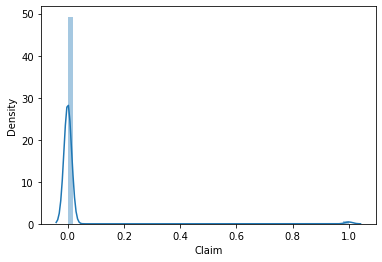

Claim 8.076976414369875


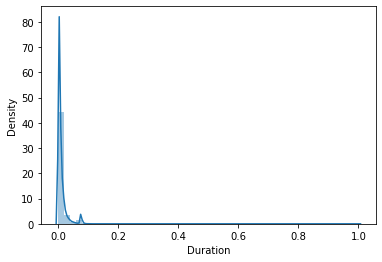

Duration 22.8789067527294


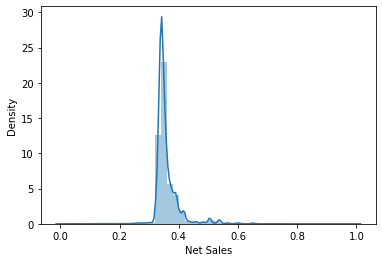

Net Sales 3.328144191034199


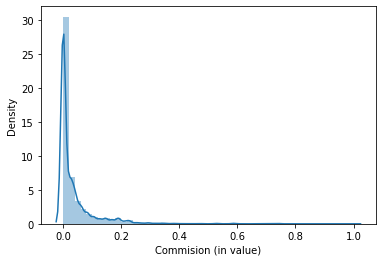

Commision (in value) 4.07806843566346


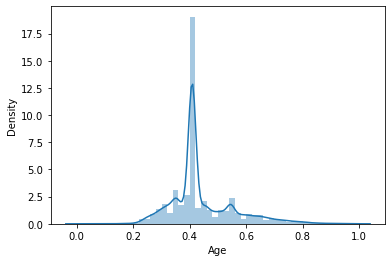

Age 1.2032135027976119


In [34]:
from scipy.stats import skew #liabrary  for skiwness showing
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(col, skew(df_num[col]))

In [35]:
for col in df_num:
  if skew(df_num[col]) >= 0.5 or skew(df_num[col]) <= -0.5:
    df_num[col] = np.sqrt(df_num[col])
    #df_num[col] = np.log(df_num[col]) 

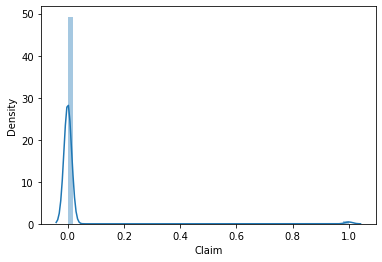

Claim 8.076976414369875


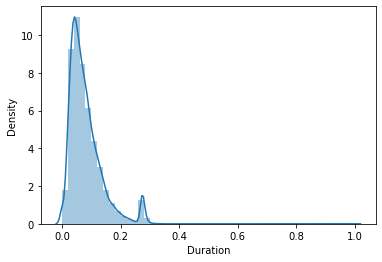

Duration 2.3154214359689886


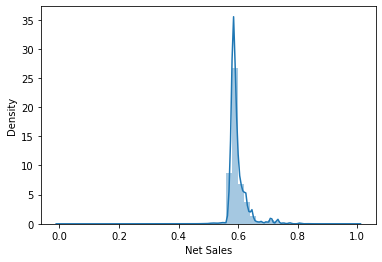

Net Sales 2.490325174256031


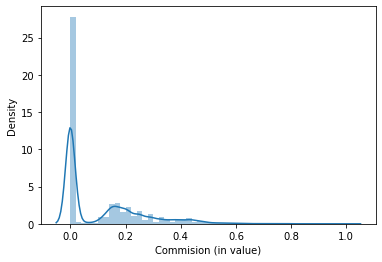

Commision (in value) 1.3513194369869306


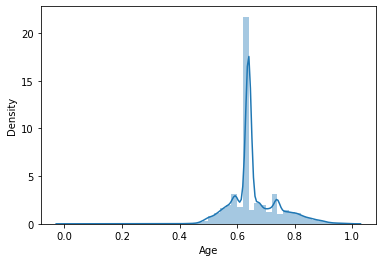

Age 0.684930238396927


In [36]:
 for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(col, skew(df_num[col]))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50553 non-null  object 
 1   Agency Type           50553 non-null  object 
 2   Distribution Channel  50553 non-null  object 
 3   Product Name          50553 non-null  object 
 4   Claim                 50553 non-null  int64  
 5   Duration              50553 non-null  int64  
 6   Destination           50553 non-null  object 
 7   Net Sales             50553 non-null  float64
 8   Commision (in value)  50553 non-null  float64
 9   Age                   50553 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


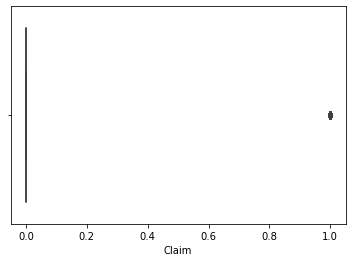

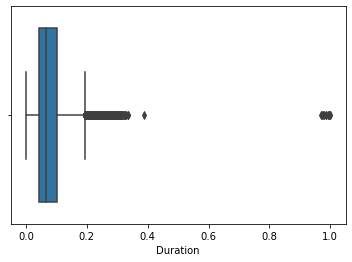

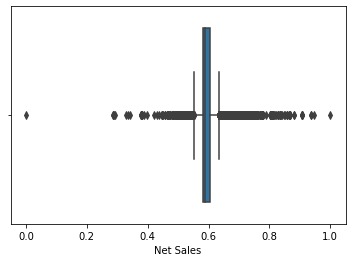

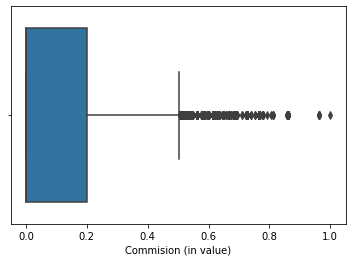

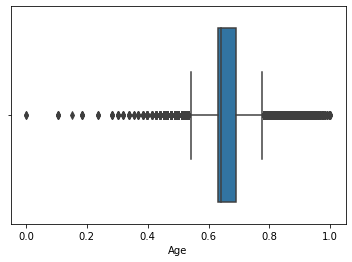

In [38]:
for col in df_num:
    plt.figure()
    sns.boxplot(df_num[col])
    plt.show()

In [39]:
 df[(df["Age"] < 2)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
1362,TST,Travel Agency,Offline,Travel Cruise Protect,0,94,THAILAND,30.0,10.50,0
10890,C2B,Airlines,Online,Bronze Plan,0,56,SINGAPORE,86.5,21.63,1
16332,C2B,Airlines,Online,Bronze Plan,0,12,SINGAPORE,16.0,4.00,1
20779,C2B,Airlines,Online,Silver Plan,0,33,SINGAPORE,74.4,18.60,1
45736,C2B,Airlines,Online,Silver Plan,0,10,SINGAPORE,46.8,11.70,1
45828,TST,Travel Agency,Offline,Travel Cruise Protect,0,94,THAILAND,-30.0,10.50,0


In [40]:
df.drop(1362, inplace=True)  
df.drop(16332, inplace=True)
df.drop(20779, inplace=True)
df.drop(45736, inplace=True)
df.drop(45828, inplace=True)
df.drop(10890, inplace=True)

In [41]:
 df[(df["Age"] < 2)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


# DATA Balancing

0.0    49812
1.0      741
Name: Claim, dtype: int64
---------------------------------------------------


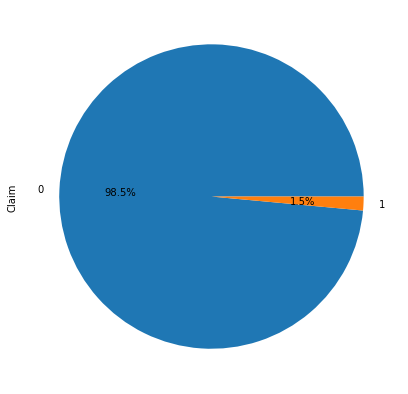

In [42]:
print(df_clean["Claim"].value_counts())
print("---------------------------------------------------")
plt.figure(figsize=(7,7))
df["Claim"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [43]:
#our data is imbalance so we are doing over sampling because of data is not too much
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros = RandomOverSampler(random_state=1)


In [45]:
X_sample2, y_sample2 = ros.fit_sample(X_train,y_train)
X_sample2_test, y_sample2_test = ros.fit_sample(X_test,y_test)

In [46]:
pd.Series(y_sample2).value_counts()

1.0    34851
0.0    34851
Name: Claim, dtype: int64

In [47]:
lr3 = LogisticRegression()
lr3.fit(X_sample2, y_sample2)

LogisticRegression()

In [48]:
y_pred3= lr3.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.91     14961
         1.0       0.05      0.63      0.09       205

    accuracy                           0.83     15166
   macro avg       0.52      0.73      0.50     15166
weighted avg       0.98      0.83      0.89     15166



In [50]:
def train_model(model): 
  model.fit(X_sample2,y_sample2)
  y_pred3 = model.predict(X_test)
  print(classification_report(y_pred3,y_test))
  return model

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [52]:
model=train_model(dt)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14900
         1.0       0.09      0.07      0.08       266

    accuracy                           0.97     15166
   macro avg       0.54      0.53      0.53     15166
weighted avg       0.97      0.97      0.97     15166



In [53]:
dt2 = DecisionTreeClassifier(criterion="entropy")

In [54]:
model2 = train_model(dt2)
#f1 score same as defult gimi index

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14915
         1.0       0.04      0.04      0.04       251

    accuracy                           0.97     15166
   macro avg       0.51      0.51      0.51     15166
weighted avg       0.97      0.97      0.97     15166



In [55]:
#to know the depth
model.get_depth()

42

In [56]:
model2.get_depth()

41

In [57]:
# Pruning
dt3 = DecisionTreeClassifier(max_depth=30)
model3 = train_model(dt3)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     14861
         1.0       0.09      0.06      0.07       305

    accuracy                           0.97     15166
   macro avg       0.53      0.52      0.53     15166
weighted avg       0.96      0.97      0.97     15166



In [58]:
#mean sample leaf
dt4 = DecisionTreeClassifier(min_samples_leaf=10)
model4 = train_model(dt4)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     14261
         1.0       0.20      0.05      0.08       905

    accuracy                           0.93     15166
   macro avg       0.57      0.52      0.52     15166
weighted avg       0.90      0.93      0.91     15166



In [59]:
#combine score
dt5 = DecisionTreeClassifier(max_depth=30,min_samples_leaf=10)
model5 = train_model(dt5)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     14254
         1.0       0.21      0.05      0.08       912

    accuracy                           0.93     15166
   macro avg       0.58      0.52      0.52     15166
weighted avg       0.90      0.93      0.91     15166



In [60]:
#randomForest
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=70,random_state=1,max_features=8,max_depth=26)
rf.fit(X_sample2, y_sample2)

RandomForestClassifier(max_depth=26, max_features=8, n_estimators=70,
                       random_state=1)

In [62]:
y_pred3 = rf.predict(X_test)
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     14844
         1.0       0.13      0.08      0.10       322

    accuracy                           0.97     15166
   macro avg       0.55      0.53      0.54     15166
weighted avg       0.96      0.97      0.97     15166



<AxesSubplot:>

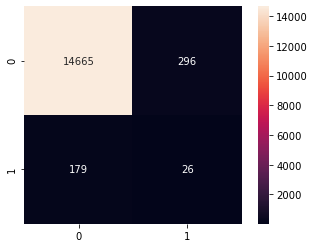

In [63]:
from sklearn.metrics import  confusion_matrix
mat = confusion_matrix(y_test,y_pred3)
sns.heatmap(mat,square=True,fmt="d",annot=True)

In [64]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

In [65]:
ada=AdaBoostClassifier(n_estimators=50)

In [66]:
ada.fit(X_sample2,y_sample2)

AdaBoostClassifier()

In [67]:
y_pred3 = ada.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89     14961
         1.0       0.04      0.65      0.08       205

    accuracy                           0.80     15166
   macro avg       0.52      0.73      0.48     15166
weighted avg       0.98      0.80      0.88     15166



In [68]:
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier


In [69]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5)


In [70]:
gb.fit(X_sample2,y_sample2)


GradientBoostingClassifier(learning_rate=0.5)

In [71]:
y_pred3 = gb.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     14961
         1.0       0.05      0.51      0.09       205

    accuracy                           0.85     15166
   macro avg       0.52      0.69      0.50     15166
weighted avg       0.98      0.85      0.91     15166



In [73]:
! pip install xgboost
from xgboost import XGBClassifier

In [74]:
xg=XGBClassifier(n_estimators=150)

In [75]:
xg.fit(X_sample2,y_sample2)

[16:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_pred3 =xg.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     14961
         1.0       0.06      0.24      0.10       205

    accuracy                           0.94     15166
   macro avg       0.52      0.60      0.53     15166
weighted avg       0.98      0.94      0.96     15166



In [77]:
# Linear SVM(svc=support vector classification)
from sklearn.svm import LinearSVC

In [78]:
lin = LinearSVC(random_state=1)
lin.fit(X_sample2,y_sample2)

LinearSVC(random_state=1)

In [79]:
y_pred3 = lin.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     14961
         1.0       0.08      0.32      0.13       205

    accuracy                           0.94     15166
   macro avg       0.53      0.63      0.55     15166
weighted avg       0.98      0.94      0.96     15166



In [80]:
# soft margin#value of C can be 0.1 to 1. 1value means no regularisation.if accracy value remain same after changing C value means there is no outliers present in data
lin = LinearSVC(C=0.5,random_state=1)

In [81]:
lin.fit(X_sample2,y_sample2)

LinearSVC(C=0.5, random_state=1)

In [82]:
y_pred = lin.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89     14961
         1.0       0.04      0.64      0.08       205

    accuracy                           0.80     15166
   macro avg       0.52      0.72      0.49     15166
weighted avg       0.98      0.80      0.88     15166



In [83]:
# radial bias
from sklearn.svm import SVC
svc = SVC(random_state=1,kernel="rbf")

In [84]:
svc.fit(X_sample2,y_sample2)

SVC(random_state=1)

In [85]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     14961
         1.0       0.06      0.56      0.10       205

    accuracy                           0.87     15166
   macro avg       0.52      0.72      0.51     15166
weighted avg       0.98      0.87      0.92     15166



In [86]:
df_clean

,Claim,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,0.0,0.001230,0.324437,0.062857,0.352273,6,1,1,16,56
1,0.0,0.017213,0.381985,0.000000,0.409091,7,1,1,10,79
2,0.0,0.002049,0.340951,0.041905,0.852273,6,1,1,16,56
3,0.0,0.003074,0.341118,0.000000,0.363636,7,1,1,1,38
4,0.0,0.001844,0.336947,0.000000,0.329545,7,1,1,10,47
...,...,...,...,...,...,...,...,...,...,...
50548,0.0,0.002049,0.407006,0.209524,0.568182,6,1,1,16,65
50549,0.0,0.009631,0.341118,0.000000,0.409091,7,1,1,0,38
50550,0.0,0.004713,0.347790,0.037531,0.545455,10,1,1,24,38
50551,0.0,0.004918,0.336947,0.000000,0.409091,7,1,1,10,7


In [87]:
df.corr()

,Claim,Duration,Net Sales,Commision (in value),Age
Claim,1.000000,0.076411,0.138328,0.102012,-0.013635
Duration,0.076411,1.000000,0.436961,0.349222,0.028108
Net Sales,0.138328,0.436961,1.000000,0.657861,0.029499
Commision (in value),0.102012,0.349222,0.657861,1.000000,0.107632
Age,-0.013635,0.028108,0.029499,0.107632,1.000000


In [88]:
from sklearn.feature_selection import chi2 # chi2
from sklearn.feature_selection import f_regression # anova
from sklearn.feature_selection import SelectKBest

In [89]:
 # anova
anova = SelectKBest(score_func=f_regression,k=6)
X_train_anova = anova.fit_transform(X_sample2,y_sample2)
X_test_anova = anova.transform(X_test)

In [90]:
model2= LogisticRegression()

In [91]:
model.fit(X_sample2,y_sample2)

DecisionTreeClassifier()

In [92]:
y_pred = model.predict(X_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     14961
         1.0       0.06      0.08      0.07       205

    accuracy                           0.97     15166
   macro avg       0.52      0.53      0.53     15166
weighted avg       0.97      0.97      0.97     15166



In [94]:
columns = []

for col in X:
    columns.append(col)
  
    X_new = df_clean[columns]
    
    X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=1)
    
    lin = LogisticRegression()
    
    lin.fit(X_train,y_train)
    
    r2 = lin.score(X_test,y_test)
        
    print("col: ",col,"r2 score: ",r2)

col:  Duration r2 score:  0.9864829223262561
col:  Net Sales r2 score:  0.986416985361994
col:  Commision (in value) r2 score:  0.986416985361994
col:  Age r2 score:  0.986416985361994
col:  Agency r2 score:  0.9864829223262561
col:  Agency Type r2 score:  0.9864829223262561
col:  Distribution Channel r2 score:  0.9864829223262561
col:  Product Name r2 score:  0.9864829223262561
col:  Destination r2 score:  0.9864829223262561


In [95]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [96]:
for i in range(50):
    l2 = Ridge(i)
    l2.fit(X_sample2,y_sample2)
    print(i,":",l2.score(X_sample2,y_sample2))
    print(i,":",l2.score(X_test,y_test))
    print("--------------------------")

0 : 0.2588471655686625
0 : -11.619858156278532
--------------------------
1 : 0.2588457343941488
1 : -11.621127032764582
--------------------------
2 : 0.2588419026713965
2 : -11.622443981953483
--------------------------
3 : 0.25883623171609627
3 : -11.623795293471778
--------------------------
4 : 0.25882914599919105
4 : -11.625170475622534
--------------------------
5 : 0.25882096920491726
5 : -11.626561445973344
--------------------------
6 : 0.2588119499658379
6 : -11.6279619450523
--------------------------
7 : 0.25880228046722475
7 : -11.62936710613241
--------------------------
8 : 0.2587921100548608
8 : -11.630773135811769
--------------------------
9 : 0.25878155529538627
9 : -11.632177074291786
--------------------------
10 : 0.25877070748747766
10 : -11.633576613688222
--------------------------
11 : 0.2587596383207318
11 : -11.634969959077713
--------------------------
12 : 0.25874840417472345
12 : -11.636355721343886
--------------------------
13 : 0.2587370494102209
13 :

In [97]:
for i in range(200,500,50):
    l1 = Lasso(i)
    l1.fit(X_sample2,y_sample2)
    print(i,":",l1.score(X_sample2,y_sample2))
    print(i,":",l1.score(X_test,y_test))
    print("--------------------------")

200 : 0.0
200 : -17.74854752437638
--------------------------
250 : 0.0
250 : -17.74854752437638
--------------------------
300 : 0.0
300 : -17.74854752437638
--------------------------
350 : 0.0
350 : -17.74854752437638
--------------------------
400 : 0.0
400 : -17.74854752437638
--------------------------
450 : 0.0
450 : -17.74854752437638
--------------------------


In [98]:
# Final model
L2 = Ridge(2)
L2.fit(X_train,y_train)
print(L2.score(X_test,y_test))

0.029062603579358526


In [99]:
# Final model
L1 = Lasso(200)
L1.fit(X_train,y_train)
print(L1.score(X_test,y_test))

-0.00019918548487574128


In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=3, random_state=1)

In [103]:
pc = pca.fit_transform(df_clean)

In [104]:
pc1 = pc[:,0]
pc2 = pc[:,1]
pc3 = pc[:,2]

In [105]:
print(pc1,pc2,pc3)

[  2.06915898 -21.00698172   2.06914041 ...  20.26122639  50.97350995
 -21.17148933] [ 6.66962397  1.12334742  6.67079531 ... 14.54464483 -0.1144663
 -8.86052771] [-0.99490331  0.65294045 -0.99199318 ...  2.32761031 -0.46987895
  1.13971001]
